# Change point analysis

- Create change point analysis script on smoc55

(- Plot members with events and indicate criteria)

In [1]:
import os                   # to interact with the operating system
import glob                 # return all file paths that match a specific pattern

import csv                  # to save indices
import xarray as xr

import matplotlib.pyplot as plt 

In [4]:
smoc_dir = '/Data/skd/scratch/innag3580/comp_2/smoc/'
smoc55_files = sorted(glob.glob(os.path.join(smoc_dir, '*.nc')))

hist_end = (2014-1850)*12

In [5]:
da = xr.load_dataarray(smoc55_files[1]).isel(time=slice(0,hist_end))

IndexError: list index out of range

In [5]:
# Calculate the annual means by averaging the values in each year
annual_mean = da.resample(time="1Y").mean()

In [17]:
# Define length of Period 1
P1_len = 40
# Define length of Period 2
P2_len = 20
# Compute entire period
event_period = P1_len + P2_len

# Define the threshold factor
threshold_multiple = 0.5

In [18]:
increase_indices = []
decrease_indices = []

# Start after first window size
for j in range(P1_len, len(annual_mean) - P2_len):
    
    # Compute mean and std of comparison window
    P1 = annual_mean[j - P1_len:j]
    P1_std = P1.std().item()
    P1_avg = P1.mean().item()

    # Compute mean of range of interest
    P2 = annual_mean[j:j + P2_len]
    P2_avg = P2.mean().item()
    
    # Check if the std is above the threshold
    if P2_avg >= (P1_avg + (threshold_multiple * P1_std)):
        
        if len(increase_indices) == 0:
            increase_indices.append(j)
            print('increase: ',  j)
                
        elif j >= (increase_indices[-1] + P2_len):
            increase_indices.append(j)
            print('increase: ',  j)
            
    elif P2_avg <= (P1_avg - (threshold_multiple * P1_std)):
        
        if len(decrease_indices) == 0:
            decrease_indices.append(j)
            print('decrease: ',  j)

        elif j >= (decrease_indices[-1] + P2_len):
            decrease_indices.append(j)
            print('decrease: ',  j)
            

increase:  69
increase:  89
increase:  109
decrease:  144


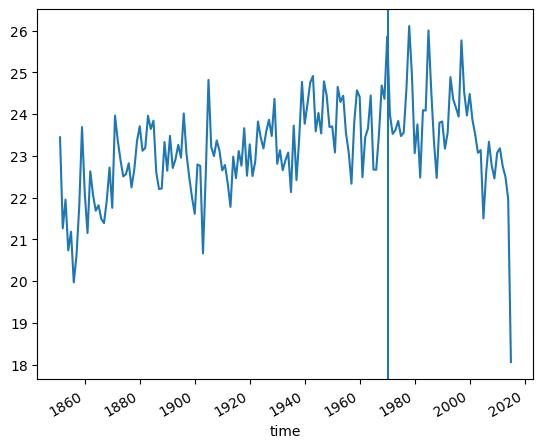

In [16]:
annual_mean.plot()
plt.axvline(x=j)

# Check detredned files

In [1]:
import time
import os
import glob
import csv
import xarray as xr

start_time = time.time()

### INITIALISATION ###

detrended = True

# load files
smoc_dir = '/Data/skd/scratch/innag3580/comp/smoc/'
smoc55_files = sorted(glob.glob(os.path.join(smoc_dir, '*.nc')))
# define historical period
hist_end = (2014-1850)*12

# Define length of Period 1
P1_len = 40
# Define length of Period 2
P2_len = 20
# Compute entire period
event_period = P1_len + P2_len
# Define the threshold factor
threshold_multiple = 3.0
print(f"""
Change point analysis started
P1 length = {P1_len}
P2 length = {P2_len}
Threshold multiple = {threshold_multiple}
""")

if detrended == True:
    print('DETRENDED')
    print('')
    file_name = 'smoc55_ensemble_mean.nc'
    smoc55_mean_file = os.path.join(smoc_dir, 'smoc55_ensemble_mean.nc')



Change point analysis started
P1 length = 40
P2 length = 20
Threshold multiple = 3.0

DETRENDED



In [18]:
criteria_indices_dict = {}
for i in range(len(smoc55_files)):
    
    # load data and compute annual mean
    da = xr.load_dataarray(smoc55_files[2:][i]).isel(time=slice(0, hist_end))
    annual_mean = da.resample(time="1Y").mean()
    break

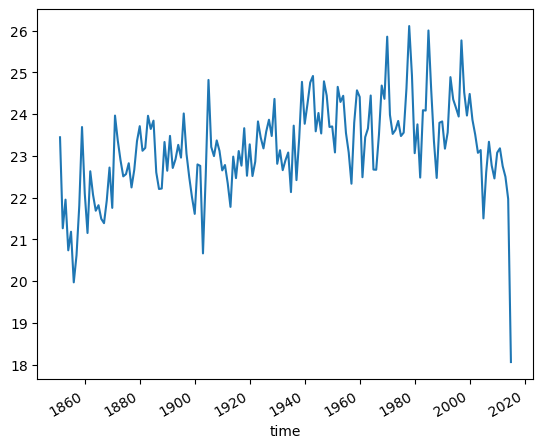

In [19]:
annual_mean.plot()

In [20]:
ensemble_mean_da = xr.load_dataarray(smoc55_mean_file).isel(time=slice(0, hist_end))
annual_ensemble_mean = ensemble_mean_da.resample(time="1Y").mean()
annual_mean = annual_mean - annual_ensemble_mean

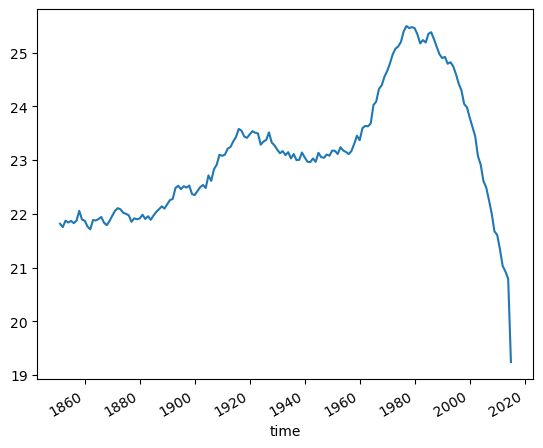

In [21]:
annual_ensemble_mean.plot()

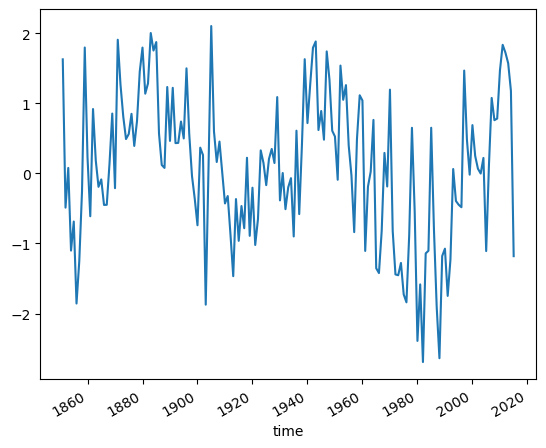

In [22]:
annual_mean.plot()